# Lista 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1

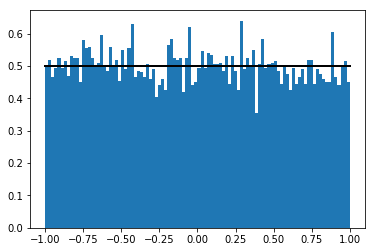

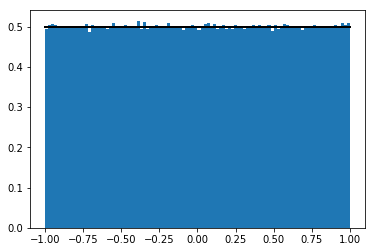

In [21]:
a1 = np.random.uniform(-1,1,10000)

plt.hist(a1,100, density=True)
plt.plot(np.linspace(-1,1,100), np.ones(100)*0.5, lw=2, c='black')
plt.show()

a2 = np.random.uniform(-1,1,1000000)

plt.hist(a2,100, density=True)
plt.plot(np.linspace(-1,1,100), np.ones(100)*0.5, lw=2, c='black')
plt.show()

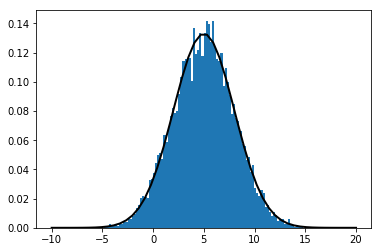

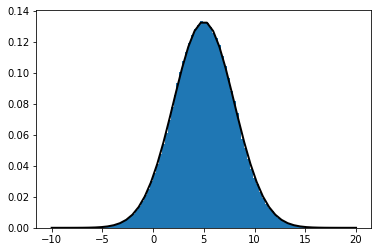

In [35]:
x = np.linspace(-10,20)

mi, sigma = 5, 3

hist = np.random.normal(mi,sigma,10000)

plt.hist(b1,100, density=True)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mi)**2 / (2 * sigma**2) ), lw=2, c='black')
plt.show()

b2 = np.random.normal(mi,sigma,1000000)

plt.hist(b2,100, density=True)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mi)**2 / (2 * sigma**2) ), lw=2, c='black')
plt.show()

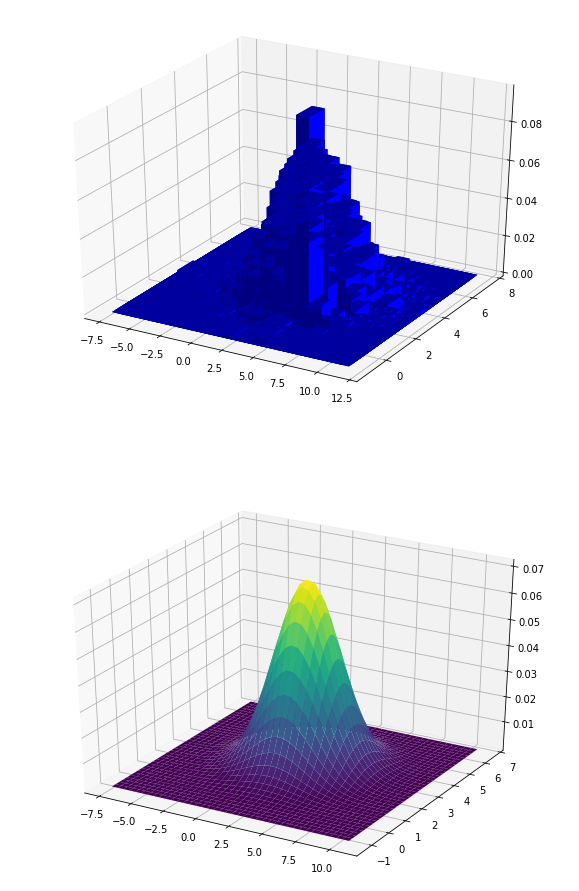

In [55]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

mi = [2,3]
cov = [[5,0],[0,1]]

c = np.random.multivariate_normal(mi,cov,10000)

hist, xedges, yedges = np.histogram2d(c[:,0],c[:,1], normed=True, bins=40)

fig = plt.figure(figsize=(10,16))
ax = fig.add_subplot(211, projection='3d')

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average',zorder=0)

X = xedges[:-1] + 0.25
Y = yedges[:-1] + 0.25
X, Y = np.meshgrid(X, Y, indexing="ij")


pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

Z = multivariate_normal(mean=mi, cov=cov).pdf(pos)
ax = fig.add_subplot(212, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis")

plt.show()



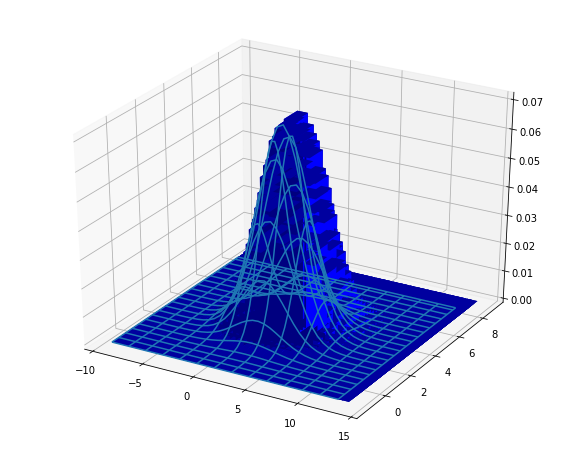

In [23]:


c2 = np.random.multivariate_normal(mi,cov,1000000)
mi = [2,3]
cov = [[5,0],[0,1]]


hist, xedges, yedges = np.histogram2d(c2[:,0],c2[:,1], normed=True, bins=40)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average', zorder=1)

X = xedges[:-1] + 0.25
Y = yedges[:-1] + 0.25
X, Y = np.meshgrid(X, Y, indexing="ij")



pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

Z = multivariate_normal(mean=mi, cov=cov).pdf(pos)
ax.plot_wireframe(X, Y, Z, rstride=3, cstride = 2 ,zorder=2, cmap="viridis")

plt.show()


### d) Oszacowanie
$$ \mathbf{P}\left( X < Y \right) = \mathbf{P}(X-Y < 0)$$
$$ X \sim N(2,5) \text{ i } Y\sim (3,1) \text{ i } X, Y \text{ - niezależne} $$
$$\text{zatem } X-Y \sim N(-1,6) = \frac{N(0,1) - 1}{\sqrt6} $$ 
$$ \mathbf{P}\left( \frac{N(0,1)}{\sqrt6} - 1 < 0 \right) = \mathbf{P}\left(N(0,1) < \frac{1}{\sqrt6} \right) = 0.658 $$

In [64]:
print(np.sum(c2[:,0]<c2[:,1])/c2.shape[0])

0.658672


## Zadanie 2

In [211]:
d = 100

x = np.random.random(d) * 10
y = np.random.random(d) * 10
w = np.random.random(d) * 10

print(np.sqrt(np.sum(x*x)))
print(np.sum(x*w)/np.sum(w))
print(np.sqrt( np.sum((x-y)*(x-y)) ))
print(np.sum(x*y))


57.0878024999742
5.094924186631701
40.35162280141873
2509.090278385477


In [212]:
N = 20
d = 100

X = np.random.random((d, N))
y = np.random.random(d)
w = np.random.random(d)

print(np.sum(X*X, axis = 0))
print(np.sum(X*w.reshape(d,1), axis = 0)/np.sum(w))
print(np.sqrt(np.sum((X-y.reshape(d,1))*(X-y.reshape(d,1)), axis = 0)))
print(np.sum((X-y.reshape(d,1))*(X-y.reshape(d,1)), axis = 0))

[36.50617333 31.97637164 33.04478166 34.21770623 34.63575204 31.60690509
 31.29040911 31.11952668 35.40881956 37.23889837 32.92311788 37.12871901
 37.00490989 32.32949491 32.90941431 30.36463185 35.00007566 35.25538127
 32.21946236 32.67177119]
[0.51537053 0.50345832 0.51652228 0.52192977 0.5073019  0.49299596
 0.48730688 0.48253921 0.52507998 0.56977639 0.51260653 0.56818981
 0.54966884 0.46208427 0.48159998 0.44255044 0.54734281 0.51362474
 0.51556692 0.48389656]
[4.49883499 4.14677949 3.95626046 4.1271367  4.083283   3.9169542
 4.32807546 3.9133531  4.64688792 4.19914391 4.45151189 4.1155353
 4.12786268 4.25627688 3.68858952 4.44574232 3.63645    3.91929987
 4.44697504 4.15576524]
[20.23951625 17.19578011 15.6519968  17.03325733 16.67320009 15.34253018
 18.73223721 15.3143325  21.59356735 17.63280956 19.81595813 16.9376308
 17.03925032 18.11589286 13.60569262 19.76462479 13.22376857 15.3609115
 19.77558705 17.27038476]


## Zadanie 3

In [213]:
from sklearn import datasets
iris = datasets.load_iris() 

print(iris.data[:10], iris.target, iris.feature_names, iris.target_names, sep='\n')

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


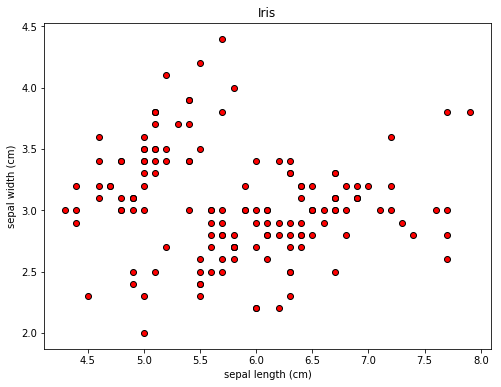

In [65]:
x = iris.data[:, 0]
y = iris.data[:, 1]

plt.figure(figsize=(8,6))
plt.title("Iris")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter(x,y, c="red", marker='o', edgecolor='black')
plt.show()

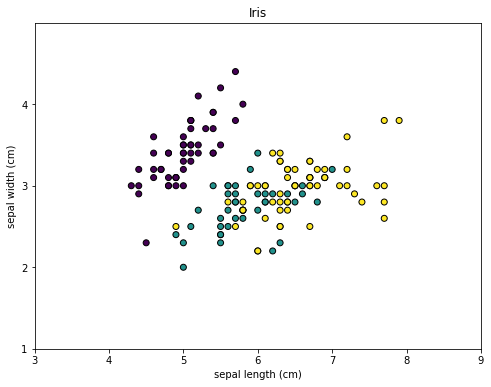

In [68]:
plt.figure(figsize=(8,6))
plt.title("Iris")
plt.xlabel(iris.feature_names[0])
plt.xlim(3,9)
plt.xticks(np.arange(3,10))
plt.ylabel(iris.feature_names[1])
plt.ylim(1,5)
plt.yticks(np.arange(1,5))
plt.scatter(x,y, c=iris.target, marker='o', edgecolor='black')
plt.show()
#plt.savefig("zadanie1work.png")

## Zadanie 4

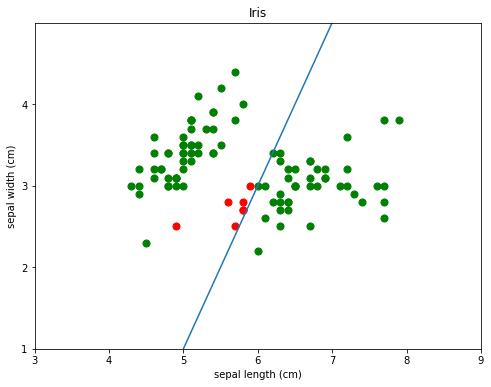

In [285]:
X1 = iris.data[iris.target != 1, 0]
X2 = iris.data[iris.target != 1, 1]
Y = iris.target[iris.target != 1]/2

x = np.linspace(3, 9)

colors = np.logical_xor(X2 > 2*X1 - 9, Y)

plt.figure(figsize=(8,6))
plt.title("Iris")
plt.xlabel(iris.feature_names[0])
plt.xlim(3,9)
plt.xticks(np.arange(3,10))
plt.ylabel(iris.feature_names[1])
plt.ylim(1,5)
plt.yticks(np.arange(1,5))
#plt.scatter(X1, X2, c=colors, cmap="RdYlGn", s=50)
plt.scatter(X1[colors], X2[colors], c="g", s = 50)
plt.scatter(X1[np.logical_not(colors)], X2[np.logical_not(colors)], c="r", s = 50)
plt.plot(x, 2*x - 9)
#plt.savefig("zadanie2a.png")
plt.show()



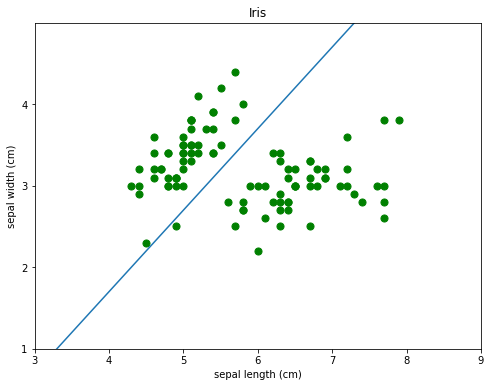

In [286]:
X1 = iris.data[iris.target != 1, 0]
X2 = iris.data[iris.target != 1, 1]
Y = iris.target[iris.target != 1]/2

x = np.linspace(3, 9)

colors = np.logical_xor(X2 > (X1 - 2.3), Y)

plt.figure(figsize=(8,6))
plt.title("Iris")
plt.xlabel(iris.feature_names[0])
plt.xlim(3,9)
plt.xticks(np.arange(3,10))
plt.ylabel(iris.feature_names[1])
plt.ylim(1,5)
plt.yticks(np.arange(1,5))
plt.scatter(X1[colors], X2[colors], c="g", s = 50)
plt.scatter(X1[np.logical_not(colors)], X2[np.logical_not(colors)], c="r", s = 50)
plt.plot(x, x-2.3)
#plt.savefig("zadanie2b.png")
plt.show()

## Zadanie 5

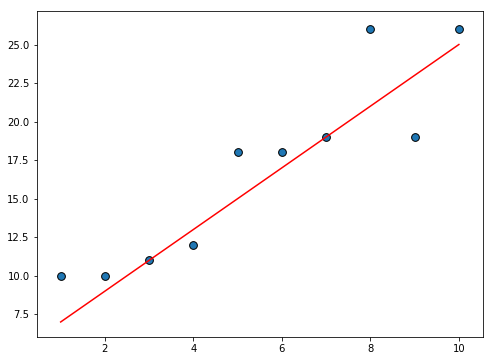

8.497058314499203


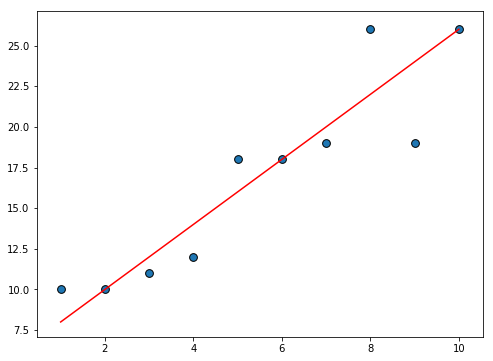

7.602631123499285


In [128]:
X = np.array([(1, 10), (2, 10),(3, 11), (4, 12), (5, 18), (6, 18), (7, 19), (8, 26), (9, 19), (10, 26)])
x = np.linspace(1,10)

plt.figure(figsize=(8,6))
plt.plot(x, 2*x + 5, c="red")
plt.scatter(X[:,0], X[:,1], s=60, edgecolor='black')
#plt.savefig("zadanie3awork.png")
plt.show()

PQ = np.array([1,2])

dists = np.abs(np.cross(PQ, X - np.array([0,5]), axisa=0))/np.sqrt(PQ.dot(PQ))
print(sum(dists))

plt.figure(figsize=(8,6))
plt.plot(x, 2*x + 6, c="red")
plt.scatter(X[:,0], X[:,1], s=60, edgecolor='black')
#plt.savefig("zadanie3bwork.png")
plt.show()

PQ = np.array([1,2])

dists = np.abs(np.cross(PQ, X - np.array([0,6]), axisa=0))/np.sqrt(PQ.dot(PQ))
print(sum(dists))

## Zadanie 6

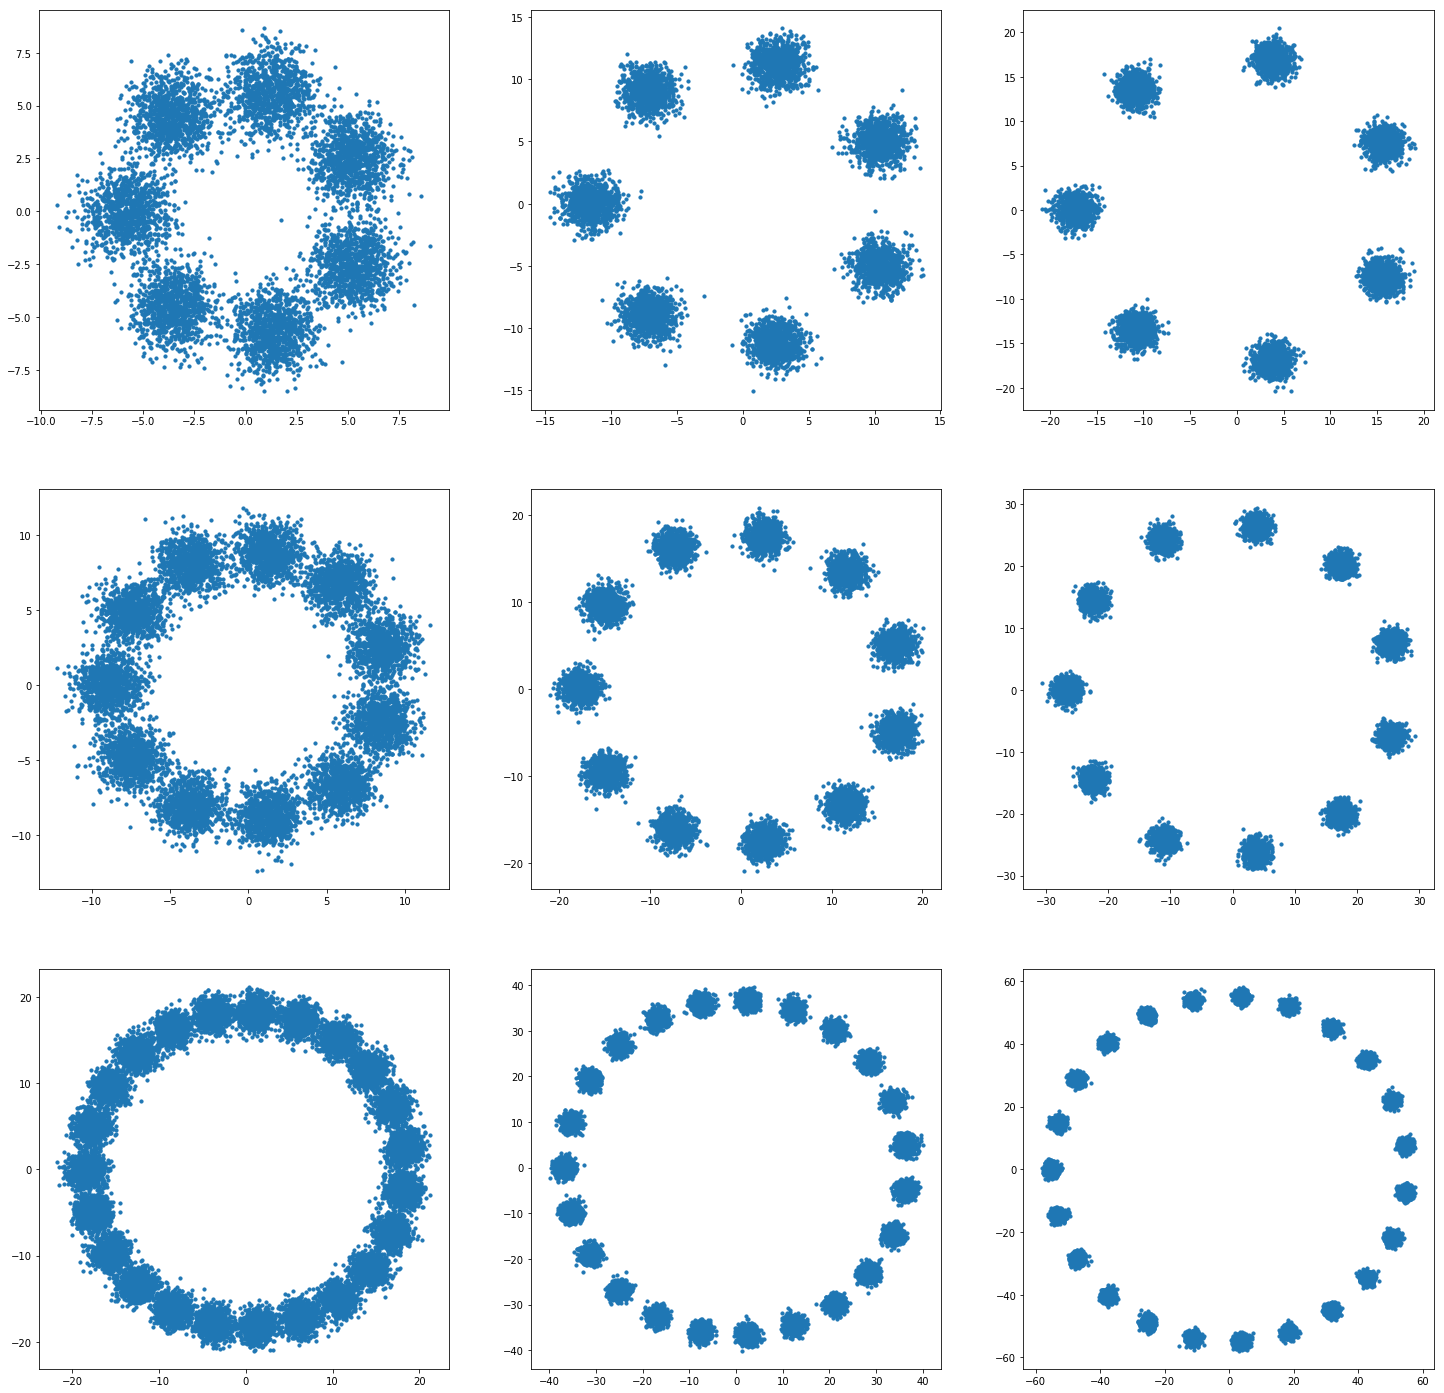

In [392]:
def points_generator(N, d, points=1000):
    a = np.arange(N)
    b = np.arange(N)
    
    r = d/np.sqrt(2*(1-np.cos(2*np.pi/N)))
    
    a = r * np.cos(2*np.pi*a/N + np.pi/N)
    b = r * np.sin(2*np.pi*b/N + np.pi/N)

    x = np.random.normal(a, 1, (points,N))
    y = np.random.normal(b, 1, (points,N))
    return x.T.ravel(), y.T.ravel(), a, b


fig, axes = plt.subplots(3,3)
fig.set_size_inches(25,25)
for i, K in enumerate([7,11,23]):
    for j, d in enumerate([5,10,15]):
        a, b, _, _ = points_generator(K,d)
        axes[i,j].scatter(a,b, s=10)


## Zadanie 7

For N=7 and d=5 errors are 1.4285714285714286%
For N=7 and d=10 errors are 0.0%
For N=7 and d=15 errors are 0.0%
For N=11 and d=5 errors are 1.0818181818181818%
For N=11 and d=10 errors are 0.0%
For N=11 and d=15 errors are 0.0%
For N=23 and d=5 errors are 1.2782608695652173%
For N=23 and d=10 errors are 0.0%
For N=23 and d=15 errors are 0.0%


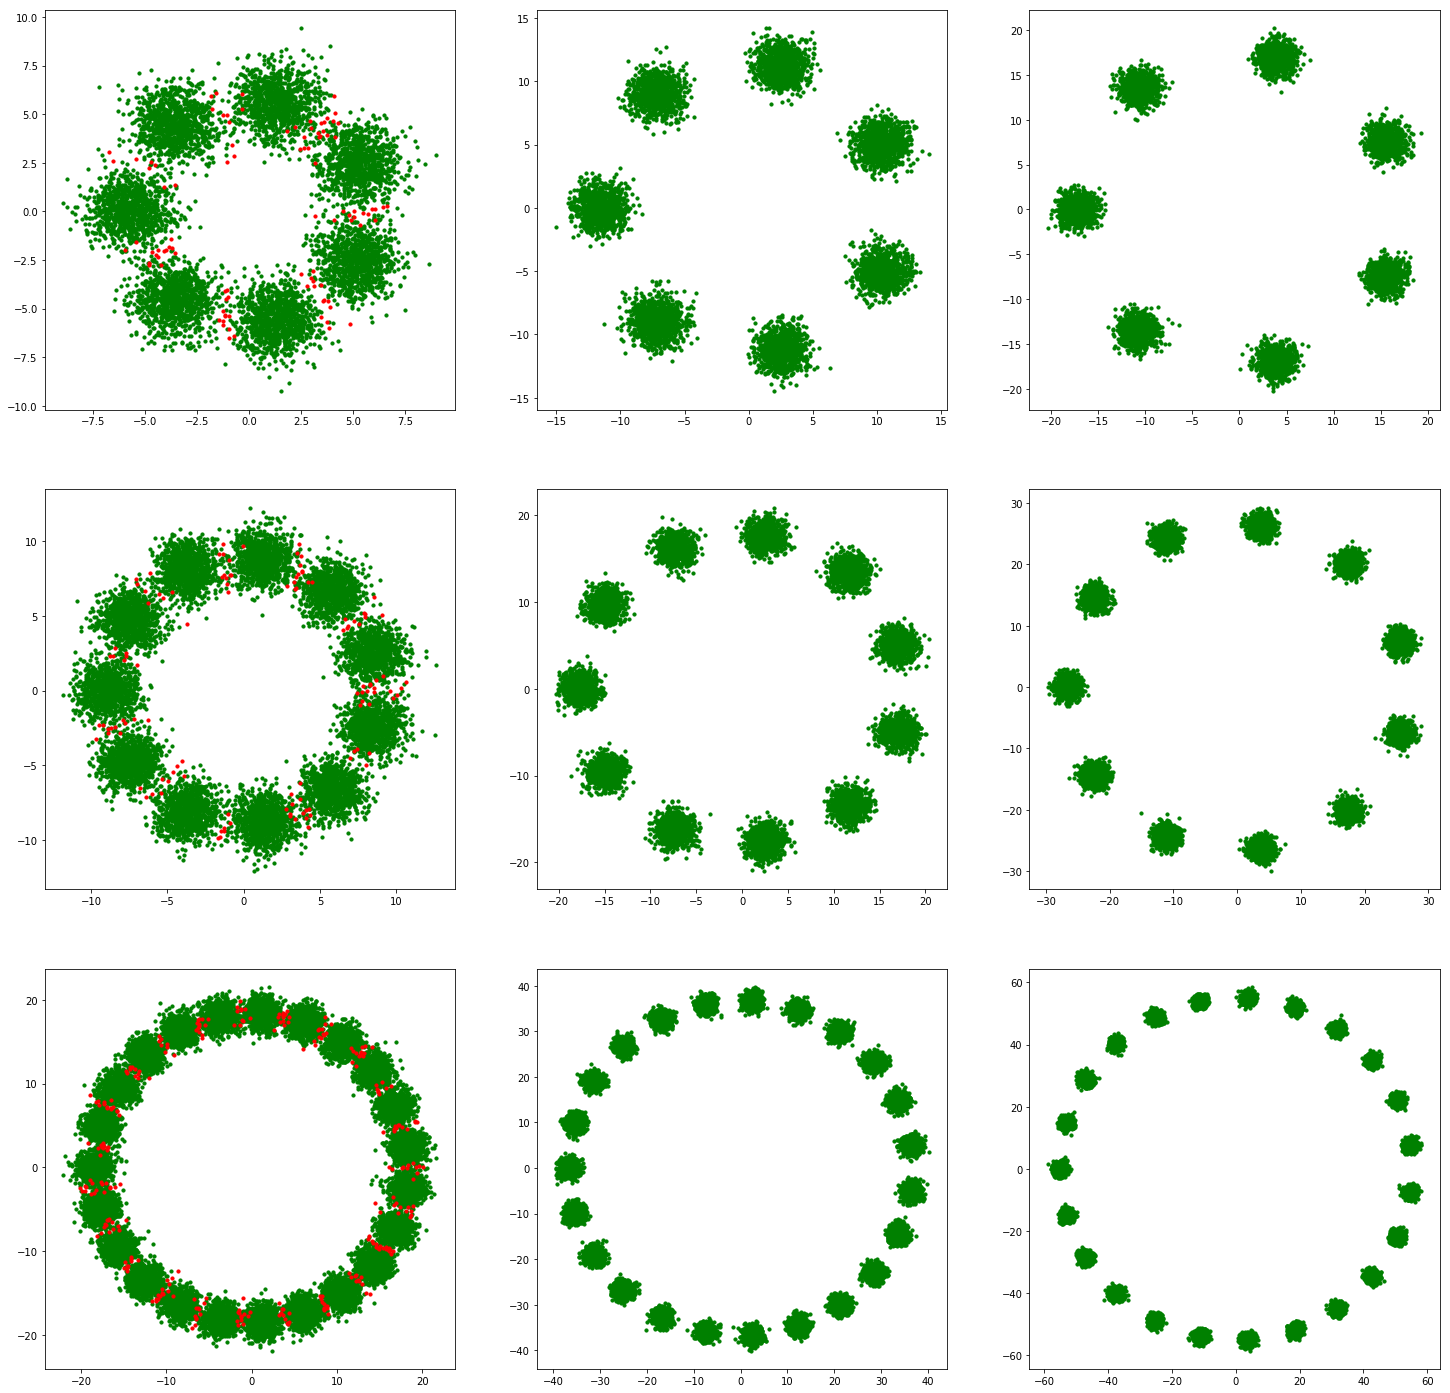

In [403]:
points = 1000
fig, axes = plt.subplots(3,3)
fig.set_size_inches(25,25)
for i, K in enumerate([7,11,23]):
    for j, d in enumerate([5,10,15]):
        x, y, a, b = points_generator(K,d, points)
        dists = (x[:, np.newaxis] - a.reshape(1,-1))**2 + (y[:, np.newaxis]-b.reshape(1,-1))**2
        good = np.equal(np.argmin(dists, axis = 1), np.arange(K * points) // points)
        bad = np.logical_not(good)
        print("For N={} and d={} errors are {}%".format(K, d, np.sum(bad)/(K*points)*100))
        
        axes[i,j].scatter(x[good],y[good], c="green", s=10)
        axes[i,j].scatter(x[bad],y[bad], c="red", s=10)
